## Assignment 1 - Classification


## Learning Outcomes


* Data exploration and pre-processing

* Develop a pipeline to carry out classification

* Compare different metrics and classifiers

The objective is to predict whether or not a credit card client will default for their payment in the next month. We will be using the better of 2 classifiers namely, Random Forest and KNN Classifier, and determine the best of a given set of hyperparameters by using grid search.


In [1]:
## Use this for consistency in graphs through out the notebook
import numpy as np
import pandas as pd
import seaborn as sns

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


**Questions (12 marks total)**

Q1.  Explore the credit card data set provided. You can also access it from the this link 

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
(https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

The data is open for public use and no authorizations are required.

You will build a classification model for this default of credit card clients dataset.  The objective is to predict whether or not a credit card client will default for their payment in the next month.

Make sure you perform your analyses and answer the questions in sections below:

1. Data exploration:  ( 3 marks) 

    - Explore the data ( for example look at the data, plot graphs ( histogram, pair plots)
    
2. Data Preprocessing: (4 marks)

    - Make sure you build a full data pipeline ( ie., use the pipeline to apply transformers and estimators- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html )
    - Do you require any data pre-processing? Are all the features useful? (Use only raw features from this dataset, in other words, no need to create feature crosses or new features)
    - Set the random seed to 123 (For splitting or any other random algorithm)
    - Split data into training (80%) and testing (20%)
    - Use Cross-validation with 5-folds
    - For other parameters, use default

3. Classification: (5 marks)

    - Study the ROC Curve, decide threshold
    - Use 2 classifiers.
    
         a. Random Forest
            - tune only: n_estimators: {4, 5, 10, 20, 50}.  We will be running random forest model using GridSearchCV, determine the best hyperparameter for the given list of n_estimators {4, 5, 10, 20, 50}. n_estimators refers to the number of trees in the forest. We will use CV = 5 and the scoring to be the roc_auc (area under the curve)
          
       b. KNN Classfier 
            - tune only: n_neighbors: {3, 5, 10, 20}. You may perform similar GridSearchCV as in the previous exercise with a given list of n_neightbors. 
        
    - Which one performs better in the cross validation? Note down your observations and give comments.
    
You may refer to the documentation for RandomForests and KNN Classifiers, for the different parameters and options available in the scikit-learn library.
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html



# 1 Data Exploration


In [2]:
df = pd.read_excel("default of credit card clients.xls", sheet = 0, skiprows= 1, header = 0)
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

              ...              BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0             ...                      0          0          0         0   
1             ...                   3272       3455       3261         0   
2             ...                  14331      14948      15549      1518   
3             ...                  28314      28959      29547      2000   
4             ...                  20940      19146      19131      2000   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0       689         0         0         0         0   
1      1000      1000      1000         0      2000   
2      1500      1000      1000      1000      5000   
3      2019      1200      1100      1069      1000   
4     36681     10000      9000       689       679   

   default payment next month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0  

[5 rows x 25 columns]

In [3]:
#rename default payment next month to a simple one
df.rename(columns={'default payment next month':'DEF_PAY'}, inplace=True)

In [4]:
#make a copy of original data
df_explore = df.copy()

1. Look at the shape of our data
2. Display each feature as a dtype (data type), and 
3. See a some samples

In [5]:
df.shape

(30000, 25)

In [6]:
df_explore.dtypes

ID           int64
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEF_PAY      int64
dtype: object

In [7]:
df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

           ...           BILL_AMT4      BILL_AMT5      BILL_AMT6  \
count      ...        30000.000000   30000.000000   30000.000000   
mean       ...        43262.948967   40311.400967   38871.760400   
std        ...        64332.856134   60797.155770   59554.107537   
min        ...      -170000.000000  -81334.000000 -339603.000000   
25%        ...         2326.750000    1763.000000    1256.000000   
50%        ...        19052.000000   18104.500000   17071.000000   
75%        ...        54506.000000   50190.500000   49198.250000   
max        ...       891586.000000  927171.000000  961664.000000   

            PAY_AMT1      PAY_AMT2      PAY_AMT3       PAY_AMT4  \
count   30000.000000  3.000000e+04   30000.00000   30000.000000   
mean     5663.580500  5.921163e+03    5225.68150    4826.076867   
std     16563.280354  2.304087e+04   17606.96147   15666.159744   
min         0.000000  0.000000e+00       0.00000       0.000000   
25%      1000.000000  8.330000e+02     390.00000     296.000000   
50%      2100.000000  2.009000e+03    1800.00000    1500.000000   
75%      5006.000000  5.000000e+03    4505.00000    4013.250000   
max    873552.000000  1.684259e+06  896040.00000  621000.000000   

            PAY_AMT5       PAY_AMT6       DEF_PAY  
count   30000.000000   30000.000000  30000.000000  
mean     4799.387633    5215.502567      0.221200  
std     15278.305679   17777.465775      0.415062  
min         0.000000       0.000000      0.000000  
25%       252.500000     117.750000      0.000000  
50%      1500.000000    1500.000000      0.000000  
75%      4031.500000    4000.000000      0.000000  
max    426529.000000  528666.000000      1.000000  

[8 rows x 25 columns]

### Check missing data


In [8]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEF_PAY      0
dtype: int64

#### There is no missing value

### Data Set Information:

This research aimed at the case of customersâ€™ default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.


### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.



### Pairs plot

C:\Dev\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Dev\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 2880x2880 with 0 Axes>

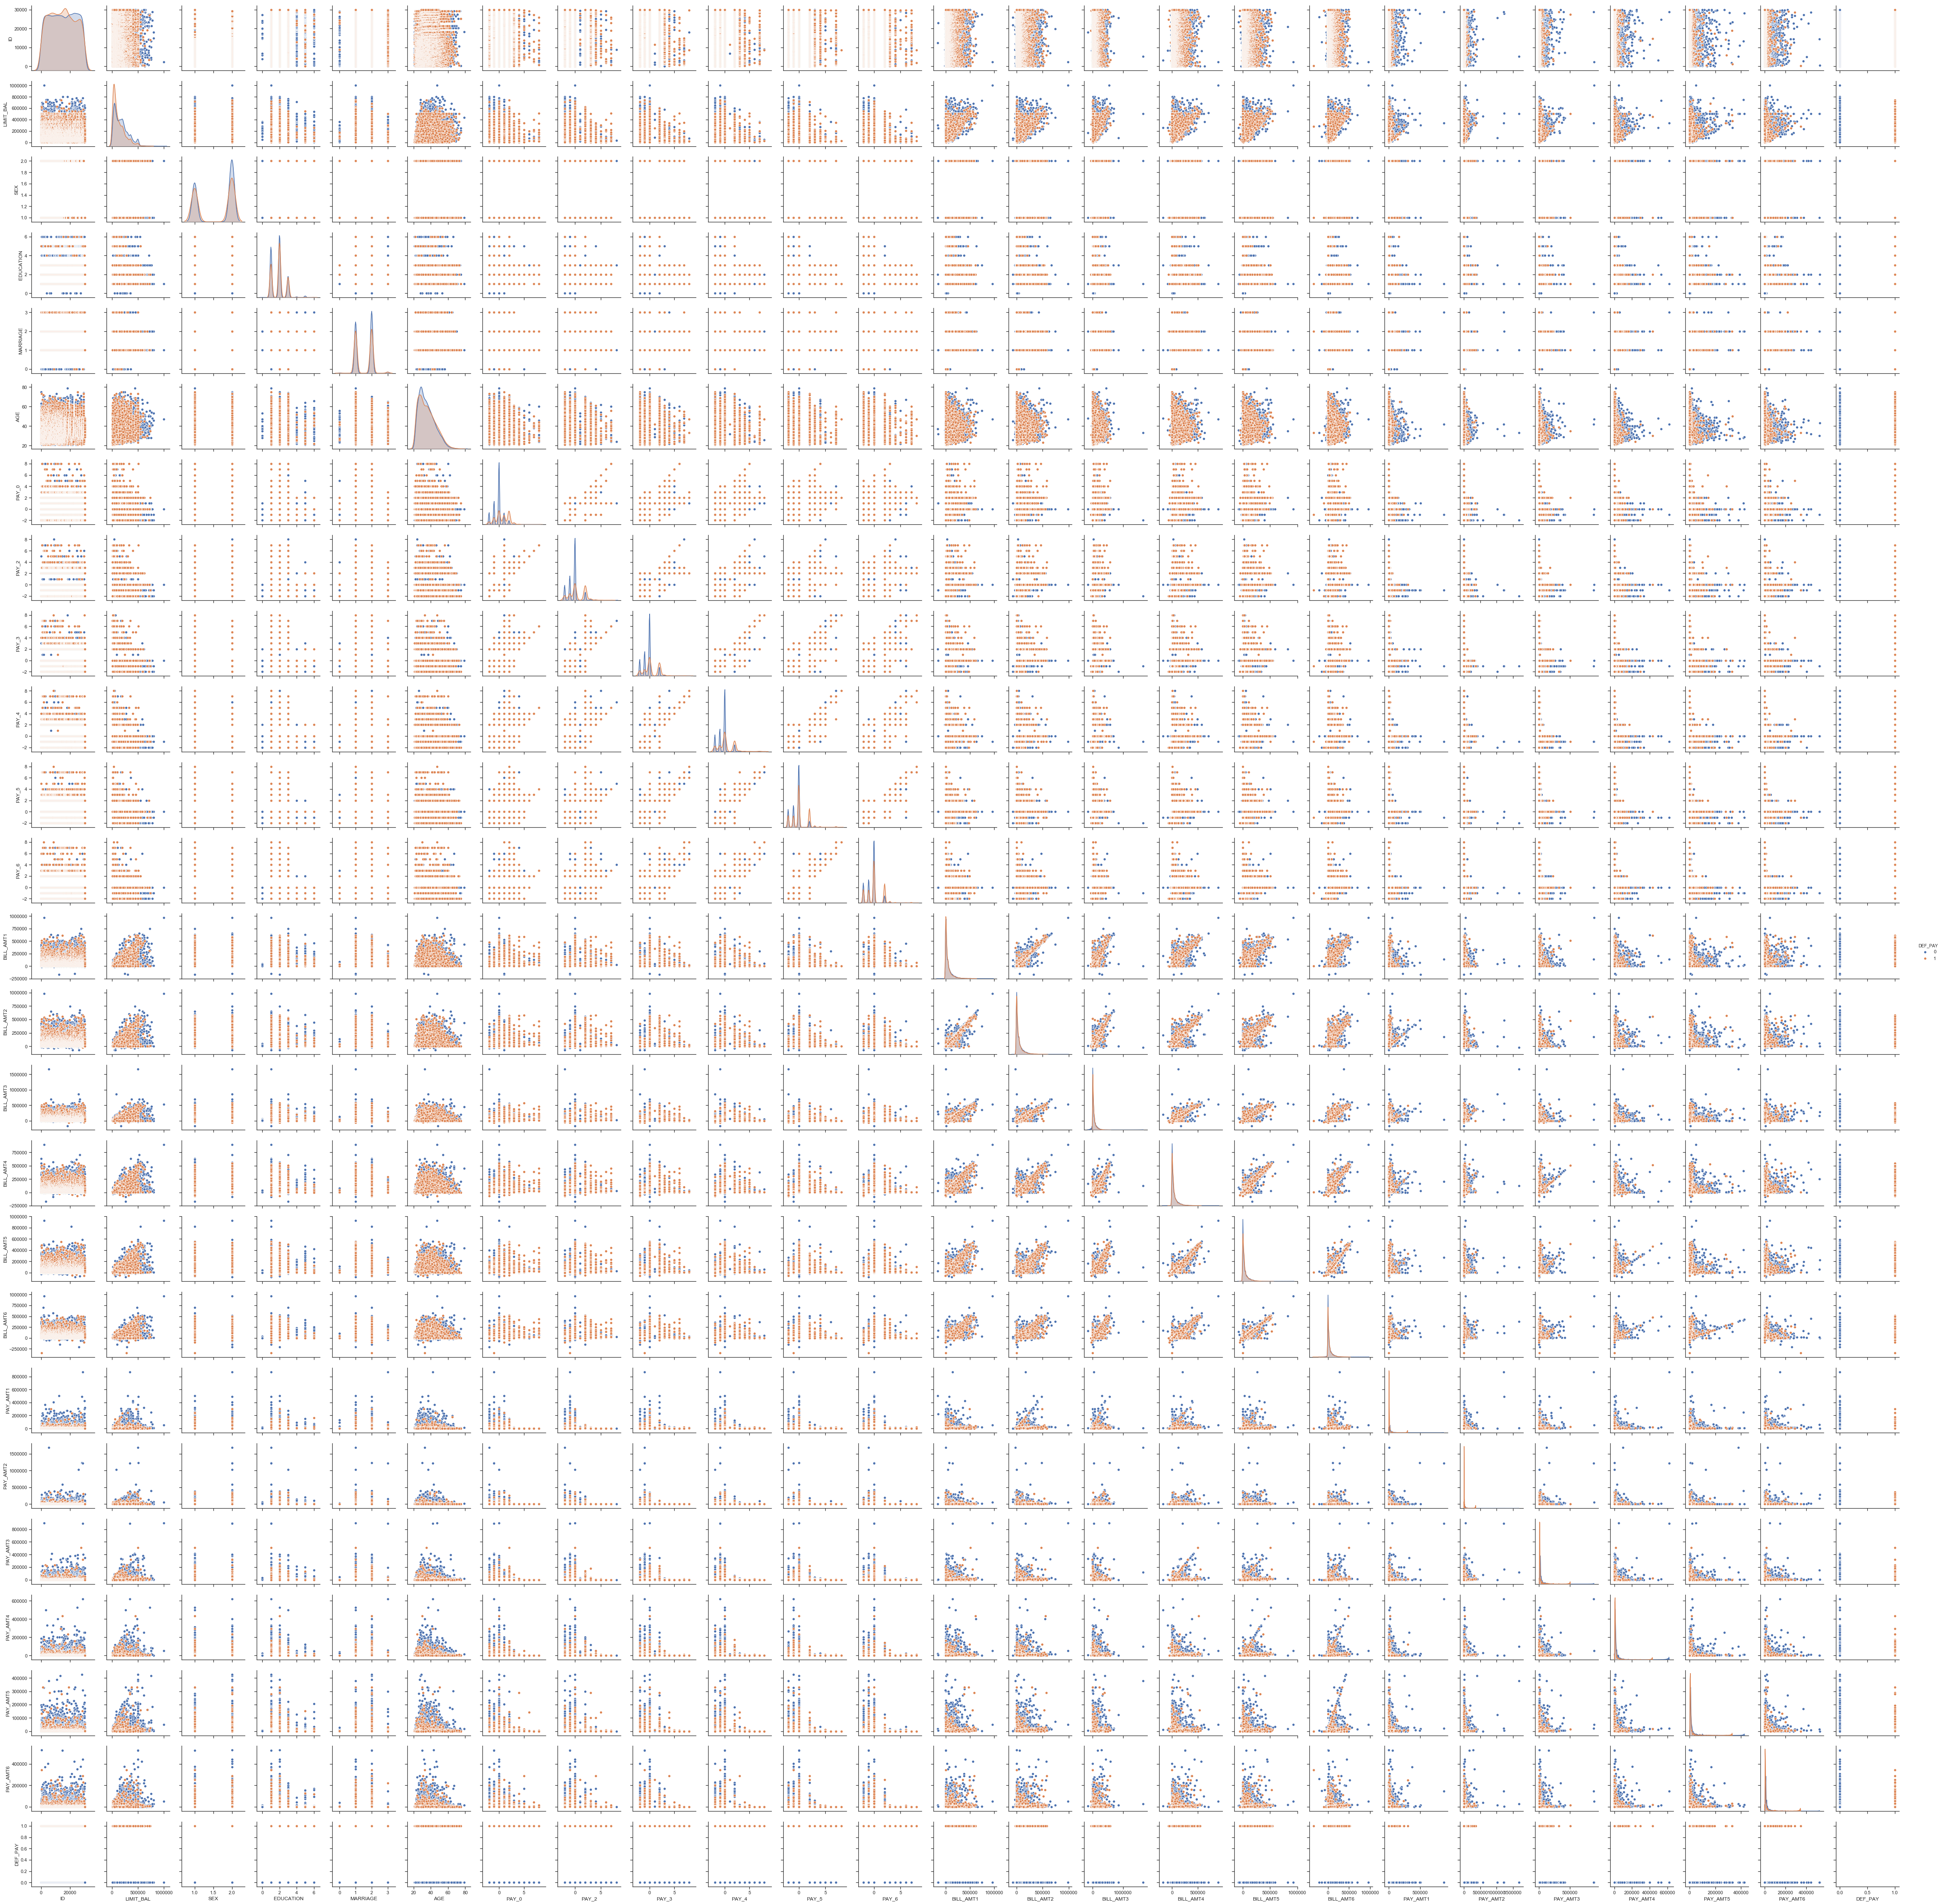

In [9]:
sns.set(style='ticks')
plt.figure(figsize=(40,40))
sns.pairplot(df, hue='DEF_PAY')

### Visualizing each measure with respect to the classes

#### Categorical variables


####  1. Gender

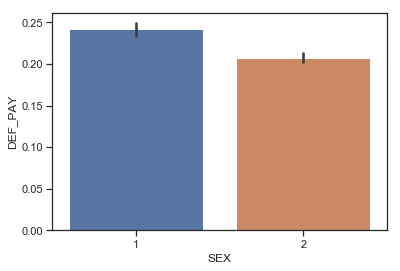

In [12]:
sns.barplot(df.SEX, df.DEF_PAY)

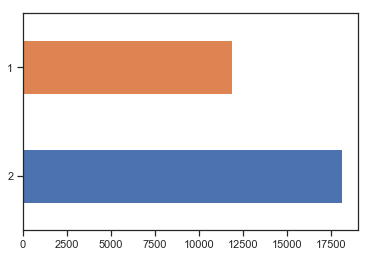

In [13]:
df.SEX.value_counts().plot(kind = "barh")

Based from the data we can see two points:
1. There are more women clients than men clients.
2. Men are more likely to make default payment than women

####  2. Education

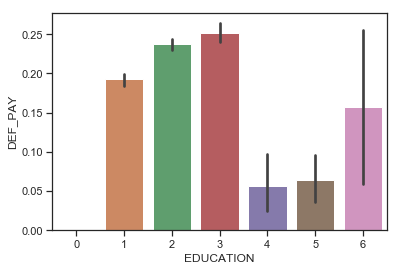

In [14]:

sns.barplot(df.EDUCATION, df.DEF_PAY)

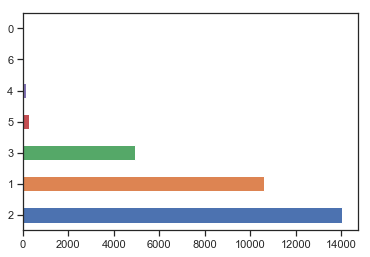

In [15]:
df.EDUCATION.value_counts().plot(kind = "barh")

#### Merge column for unkown data

In [16]:
#EDUCATION 0,4,5,6 can be all put into 4(Other)
df_education_other = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[df_education_other, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

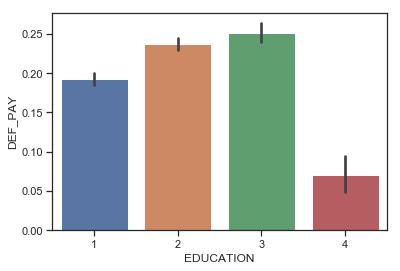

In [17]:
sns.barplot(df.EDUCATION, df.DEF_PAY)

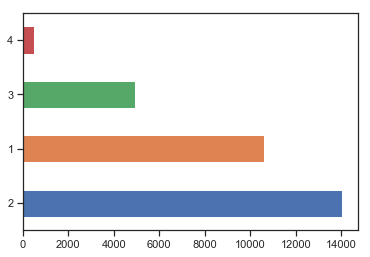

In [18]:
df.EDUCATION.value_counts().plot(kind = "barh")

Based from the data, we can see the higher education is, the less likely they will make the default payment. 

####  3. Marriage

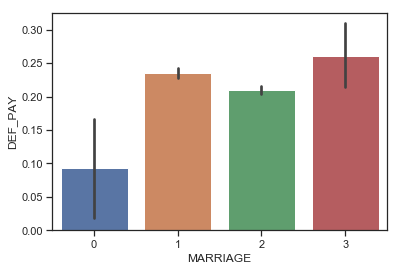

In [19]:
sns.barplot(df.MARRIAGE, df.DEF_PAY)

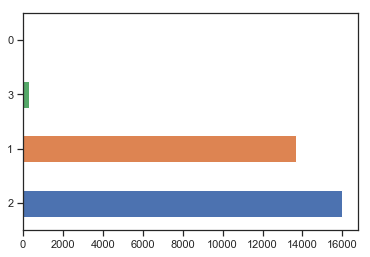

In [20]:
df.MARRIAGE.value_counts().plot(kind = "barh")

#### Merge column for unkown data

In [21]:
#Marriage 0,3 can be combine into 3(Other)
df.loc[(df.MARRIAGE == 0), 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

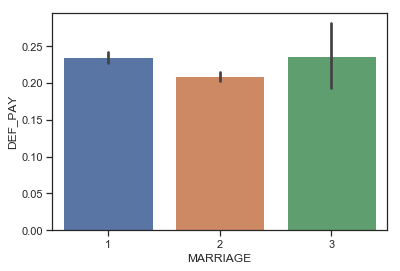

In [22]:
sns.barplot(df.MARRIAGE, df.DEF_PAY)

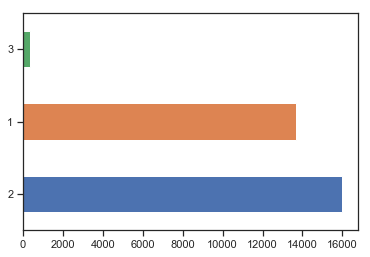

In [23]:
df.MARRIAGE.value_counts().plot(kind = "barh")

Based from the data, we can see 'Other' marriage group people are more likely to make default payment, but since the data compares to single or married is too little, we can ignore that.

Married people are more likely to make default payment than single people.

#### Numerical variables

#### 4. Age

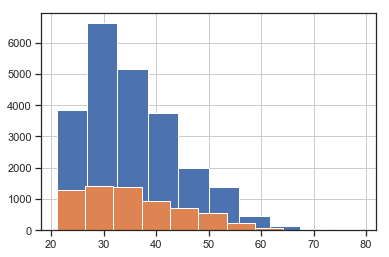

In [24]:
df.loc[df.DEF_PAY == 0].AGE.hist()
df.loc[df.DEF_PAY == 1].AGE.hist()

From the ratio in the graph, elder people and yonge people are likely to make the default payment than middle age people.

#### 5. Credit Limit

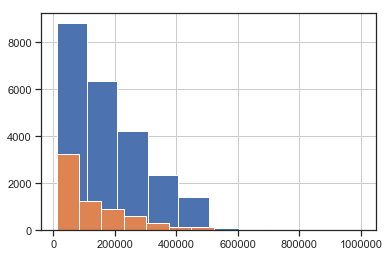

In [25]:
df.loc[df.DEF_PAY == 0].LIMIT_BAL.hist()
df.loc[df.DEF_PAY == 1].LIMIT_BAL.hist()

From the graph, it is a little hard to find which group of credit limit are more likely to make the default payment.

#### 6. Bill and Payment 

In [26]:
paylate = df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
bill = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
payment = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

# draw histograms function
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout() 
    plt.show()

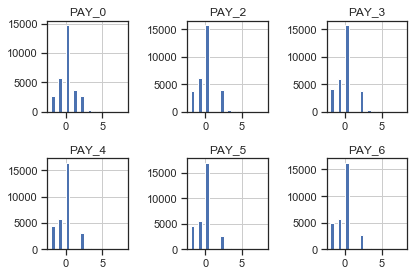

In [27]:
draw_histograms(paylate,paylate.columns, 2, 3, 20)

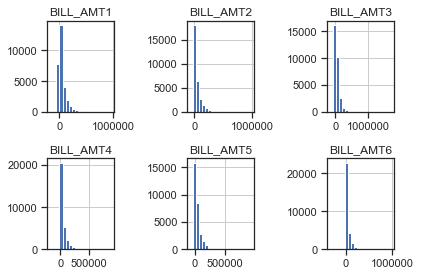

In [28]:
draw_histograms(bill,bill.columns, 2, 3, 20)

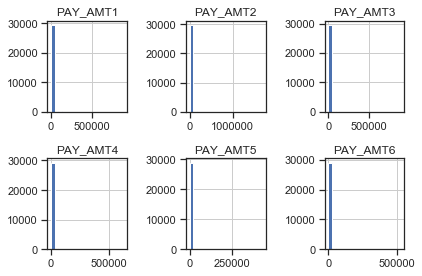

In [29]:
draw_histograms(payment,payment.columns, 2, 3, 20)

# 2 Data Preprocessing

    - Make sure you build a full data pipeline ( ie., use the pipeline to apply transformers and estimators- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html )
    - Do you require any data pre-processing? Are all the features useful? (Use only raw features from this dataset, in other words, no need to create feature crosses or new features)
    - Set the random seed to 123 (For splitting or any other random algorithm)
    - Split data into training (80%) and testing (20%)
    - Use Cross-validation with 5-folds
    - For other parameters, use default

Text(0.5,1,'Heatmap of Correlation Matrix')

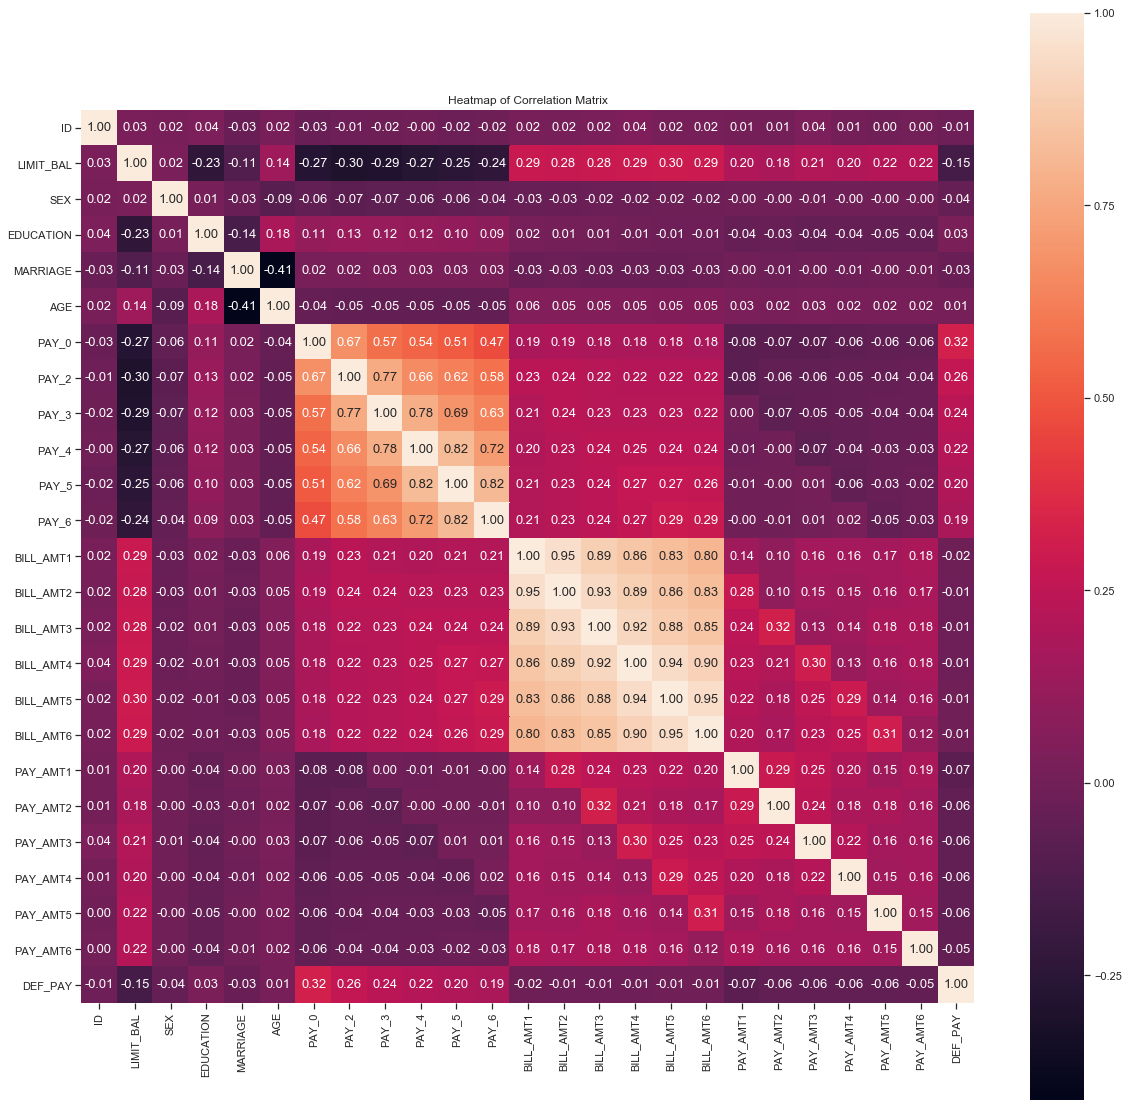

In [30]:
corr=df.corr()
corr = (corr)
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 13},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')

In [31]:
from sklearn import linear_model as lm
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm
from sklearn.datasets import samples_generator
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [32]:
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
target = 'DEF_PAY'
classifiers = [
    knnc(),
    dtc(),
    SVC(),
    SVC(kernel='linear'),
    gnb()
]
classifier_names = [
    'K nearest neighbors',
    'Decision Tree Classifier',
    'Random Forest'
]

split train and test to 8:2

In [33]:
train, test = train_test_split(df, test_size=0.2)
print(df.shape)
print(train.shape)
print(test.shape)

(30000, 25)
(24000, 25)
(6000, 25)


Run 3 classifiers using cross validation with 5-folds

In [34]:
for clf, clf_name in zip(classifiers, classifier_names):
    cv_scores = cross_val_score(clf, train[features], train[target], cv=5)
    
    print(clf_name, ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')

K nearest neighbors  mean accuracy:  75.188 % std:  0.0 %
Decision Tree Classifier  mean accuracy:  72.296 % std:  0.001 %
Random Forest  mean accuracy:  77.8 % std:  0.0 %


It appears that out of all three classifiers, the Random Forest classifier r give the best accuracy. The second one is KNN Classfier. And the Decision Tree Classifier is the least accuracy in three classifiers.

# 3. Classification: 

    - Study the ROC Curve, decide threshold
    - Use 2 classifiers.
    
         a. Random Forest
            - tune only: n_estimators: {4, 5, 10, 20, 50}.  We will be running random forest model using GridSearchCV, determine the best hyperparameter for the given list of n_estimators {4, 5, 10, 20, 50}. n_estimators refers to the number of trees in the forest. We will use CV = 5 and the scoring to be the roc_auc (area under the curve)
          
       b. KNN Classfier 
            - tune only: n_neighbors: {3, 5, 10, 20}. You may perform similar GridSearchCV as in the previous exercise with a given list of n_neightbors. 
        
    - Which one performs better in the cross validation? Note down your observations and give comments.
    
You may refer to the documentation for RandomForests and KNN Classifiers, for the different parameters and options available in the scikit-learn library.
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


In [42]:
# Use 2 classifiers.
final_model_rfc = rfc().fit(train[features], train[target])
final_model_knnc = knnc().fit(train[features], train[target])

In [43]:
y_test = test['DEF_PAY'].to_frame()
X_test=test.drop(['DEF_PAY'], axis=1)

test accuracy for Random Forest: 80.8 %


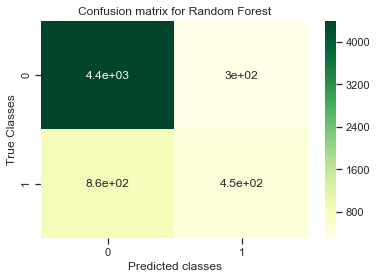

test accuracy for KNN Classfier : 75.87 %


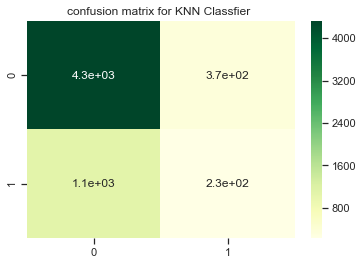

In [44]:
y_hat_rfc = final_model_rfc.predict(test[features])
y_hat_knnc = final_model_knnc.predict(test[features])

print('test accuracy for Random Forest:', round(accuracy_score(test[target], y_hat_rfc)*100, 2), '%')
plt.title('Confusion matrix for Random Forest')
sns.heatmap(confusion_matrix(test[target], y_hat_rfc), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

print('test accuracy for KNN Classfier :', \
    round(accuracy_score(test[target], y_hat_knnc)*100, 2),'%')
plt.title('confusion matrix for KNN Classfier ')
sns.heatmap(confusion_matrix(test[target], y_hat_knnc), annot=True, cmap="YlGn")
plt.show()

### Observations

As shown above, the  Random Forest model does seem to do much better from an accuracy perspective than KNN Classfier. It also has fewer false positives and more true positives than KNN.



#### Random Forest ROC CURVE

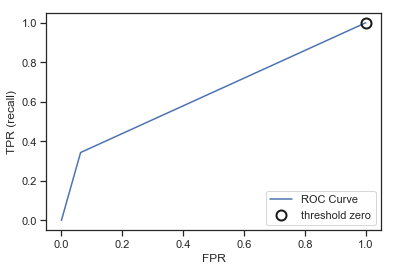

In [52]:

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_hat_rfc)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

#### KNN CLASSFIER ROC CURVE

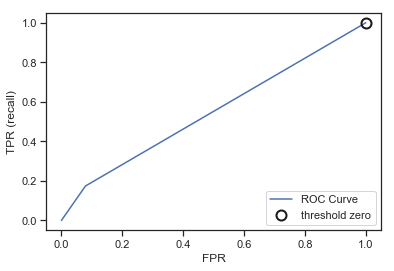

In [53]:

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_hat_knnc)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

### Observations
For the ROC curve, the ideal curve is close to the top left.
As shown above, Random Forest are more close to top left than KNN Classfier, it produces a high recall while keeping a low false positive rate.